In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankmarketingfull/bank-full.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# PRELIMINARY ANALYSIS

In [3]:
df = pd.read_csv('../input/bankmarketingfull/bank-full.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
print(df.shape)
print(df.dtypes)

(45211, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [5]:
# Print the number of unique values in each column

print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [6]:
# We convert the 'day' column to an object datatype since it's non-numerical

df['day'] = df['day'].astype('object')
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
# Make the list of continuous and categorical columns

num_col = ['age','balance','duration','campaign','pdays','previous']
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
target_col = ['y']

In [8]:
# Print the statistical summary of numerical columns 

df_cat = df[cat_col]
df_num = df[num_col]

df_num.describe()

# We can observe that columns 'campaign', 'previous' & 'pdays' show a low degree of variation
# with most of the value in pdays being -1 and in previous being '0'

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Print the statistical summary of categorical columns 

df_cat.describe()

,job,marital,education,default,housing,loan,contact,day,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959


In [10]:
# Now, let's check the number of missing values in each columns and no of duplicate rows 

print(df.isnull().sum())
print('\nTotal no of duplicate rows =',df.duplicated().sum())

# From the preliminary analysis, it seems there are no null values (np.nan datatype)
# However we need to check whether there are missing values in the non standard format by
# analyzing each column in detail.

# There are no duplicated rows in the data set as well. .

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Total no of duplicate rows = 0


#  **UNIVARIATE ANALYSIS**

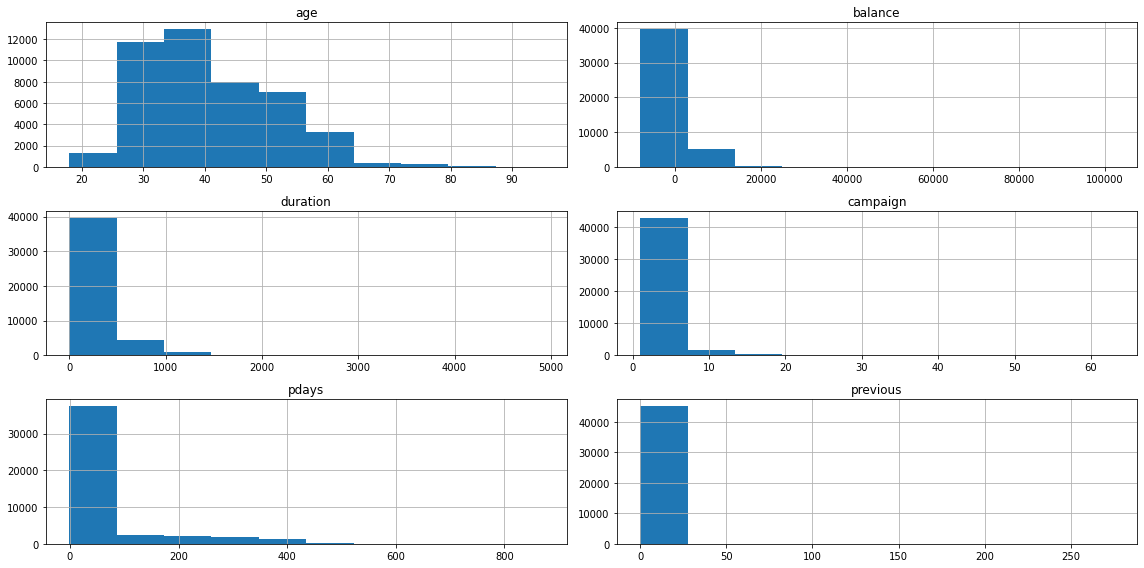

In [11]:
# Now let's check the distribution of the numeric columns in the data

df_num.hist(figsize=(16,8))
plt.tight_layout()
plt.show()

In [12]:
# OBSERVATIONS
# 1. Except age, all other variables skew highly to the right.
# 2. Columns 'campaign', 'previous' & 'pdays' show a low degree of variation 
# with most of the value in pdays being -1 and in previous being '0'

# Questions
# Should 'day' and 'month' be treated as categorical/numerical ?
# Should 'campaign' and 'previous' be treated as categorical/numerical ?

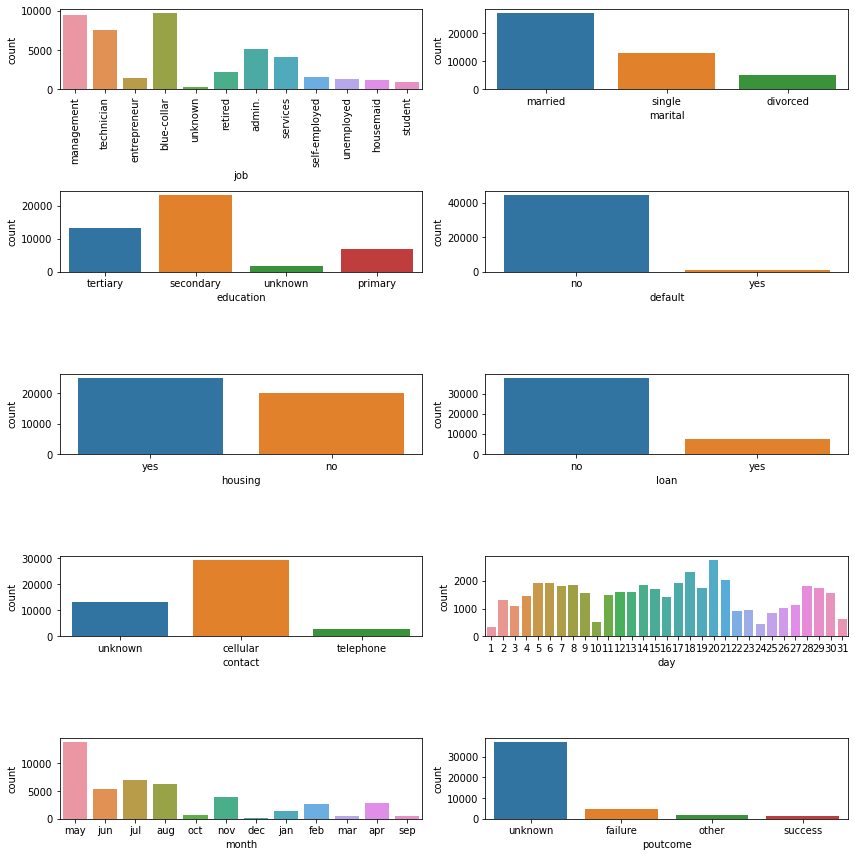

In [13]:
# Now, moving to the categorical variables, let's see the distribution of different classes
# within each of the categorical columns.

fig, axes = plt.subplots(5,2, figsize=(12,12))
for i in range(1,11):
    sns.countplot(x = cat_col[i-1], data=df_cat, ax=axes.flat[i-1])
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()
plt.show()

In [14]:
counts = pd.DataFrame(df_cat[cat_col].melt(var_name='column', value_name='value').value_counts())
counts.rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])

counts
column   value            
contact  telephone    2906
         unknown     13020
         cellular    29285
day      1             322
         24            447
...                    ...
month    may         13766
poutcome success      1511
         other        1840
         failure      4901
         unknown     36959

[75 rows x 1 columns]

In [15]:
# OBSERVATIONS

# Observe that 'loan' and 'default' columns are overrepresented in 'no' value
# From 'contact' column, most frequent mode of contact is through cellphone.
# Largest no of clients have secondary education, followed by those having tertiary and primary level of education
# Largest no are married, followed by single and divorces


# POTENTIAL NULL VALUES 

# Job column has 288 'unknown' values
# Education column has 1857 'unknown' values
# Contact columns has significant no of 'unknown' values (13020)
# Previous outcome is 'unknown' a majority of clients (36959, showing that either this is the first campaign
# where they are contacted or a lot of missing values. If it's the latter, we have to figure out 
# how to deal with missing values

# 'pdays' value is -1 for clients who were not previously contacted - This value is reset to
#  a very large value for analysis purpose

#  **OUTLIER ANALYSIS**

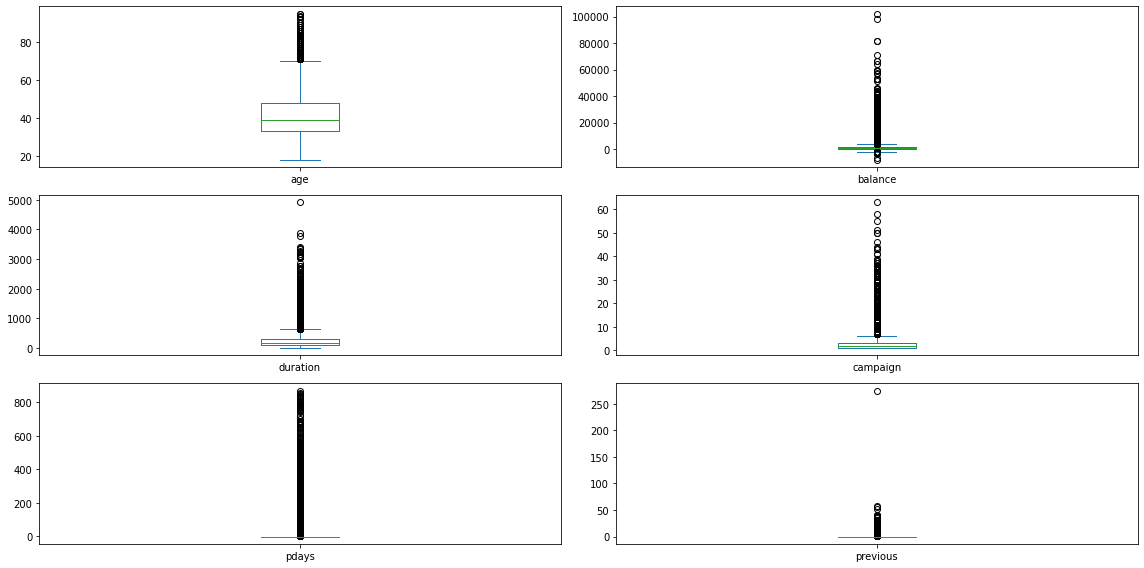

In [16]:
# Box plot of numeric variables 

df_num.plot(kind='box', figsize=(16,8), subplots=True, layout = (3,2))
plt.tight_layout()
plt.show()

# We note that except age, all other variables skew highly to the right.

In [17]:
df[num_col].skew()

# All numerical columns are highly skewed except 'age' column

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

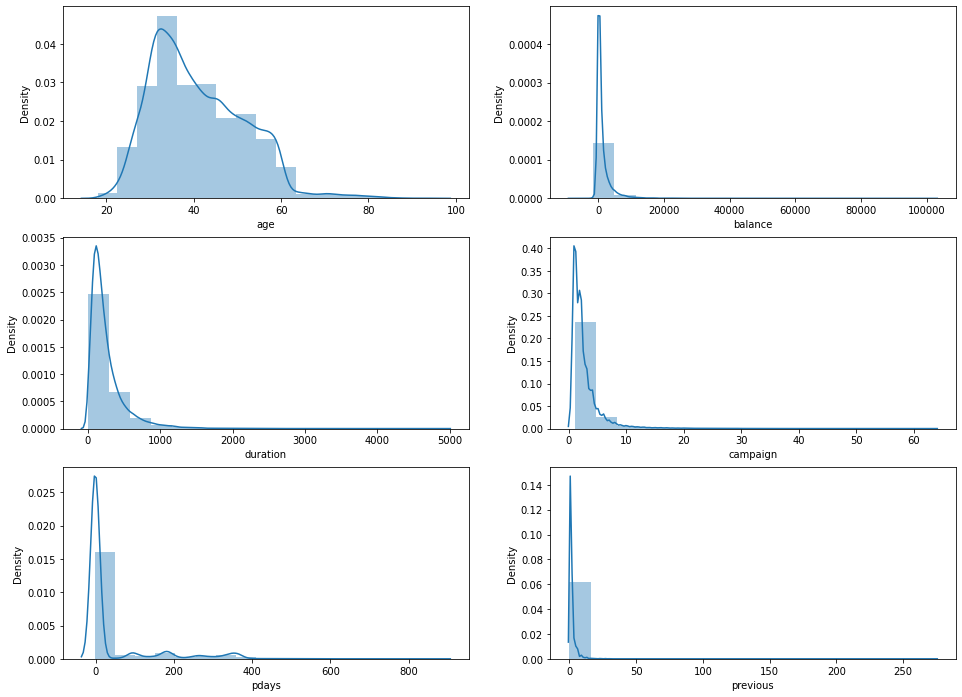

In [18]:
# Let's see the dist plots of skewed variables in more detail

fig, axes = plt.subplots(3,2, figsize=(16,12))

for i in range(6): 
    bin_edges = np.histogram_bin_edges(df_num[num_col[i]], bins = 'sturges')
    sns.distplot(df_num[num_col[i]], bins=bin_edges, ax = axes.flat[i])
plt.show()

In [19]:
# We are expecting the all numerical columns except 'age' will require some transformation
# to improve model performance

# MULTIVARIATE ANALYSIS 
### RELATIONSHIP BETWEEN COLUMNS

In [20]:
# Let's start by checking the correlation matrix for the dataframe to obtain the degree of
# correlation between the numerical variables.

corr_mat = df_num.corr()
corr_mat

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


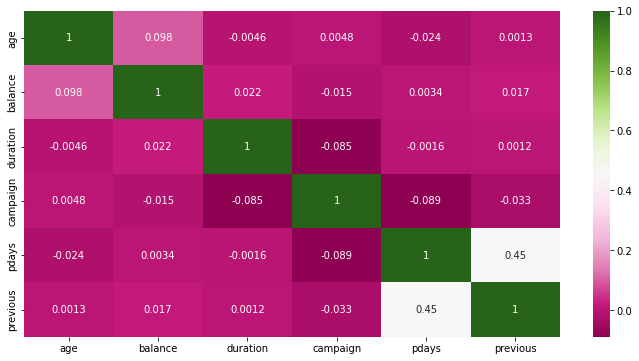

In [21]:
# Plotting a heat map of the same

plt.figure(figsize=(12,6))
sns.heatmap(corr_mat, annot=True, cmap='PiYG')
plt.show()

# The only columns that possess a significant correlation with each other are 'previous'
# and 'pdays'

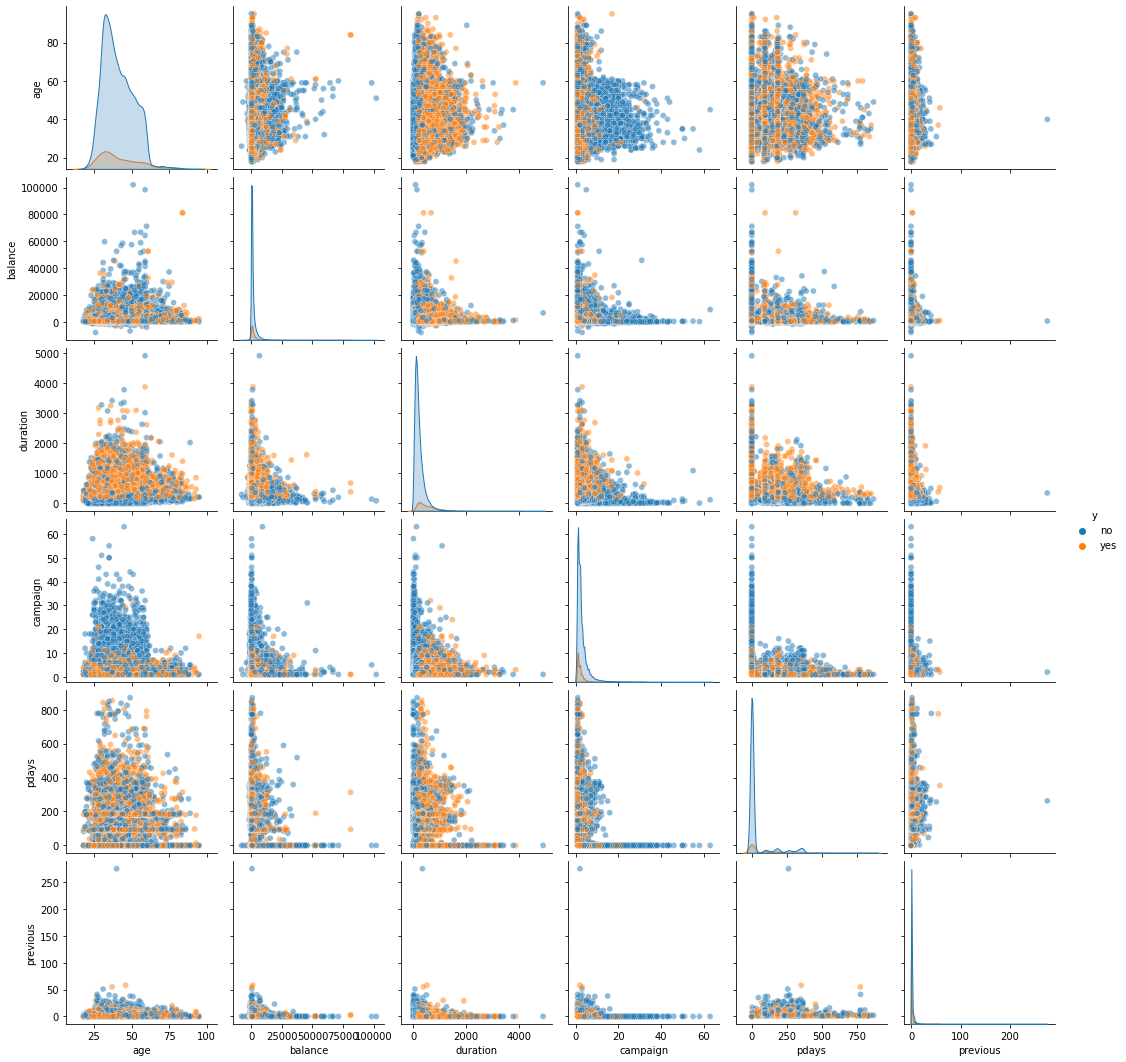

In [22]:
# Scatter plots between pairs of numerical variables to bring out the relationship between them

col_list = num_col + ['y']
sns.pairplot(data = df[col_list], hue = 'y', plot_kws={"alpha":0.5})
plt.show()

# Again it's seen that none of the columns show any significant correlation with each other
# Also, we see a fairly uniform distribution of yes/no outcomes (visualized by red/orange dots)
# for most columns 

In [23]:
# We can observe that all the columns of numerical data show no correlation with each other
# Thus, multicollinerality assumption is satisfied for the data

### TARGET VARIABLE DISTRIBUTION

In [24]:
# Distribution of target variable in dataset

df['y'].value_counts().to_frame()

# Target variable is highly unbalanced with 88% no cases.

,y
no,39922
yes,5289


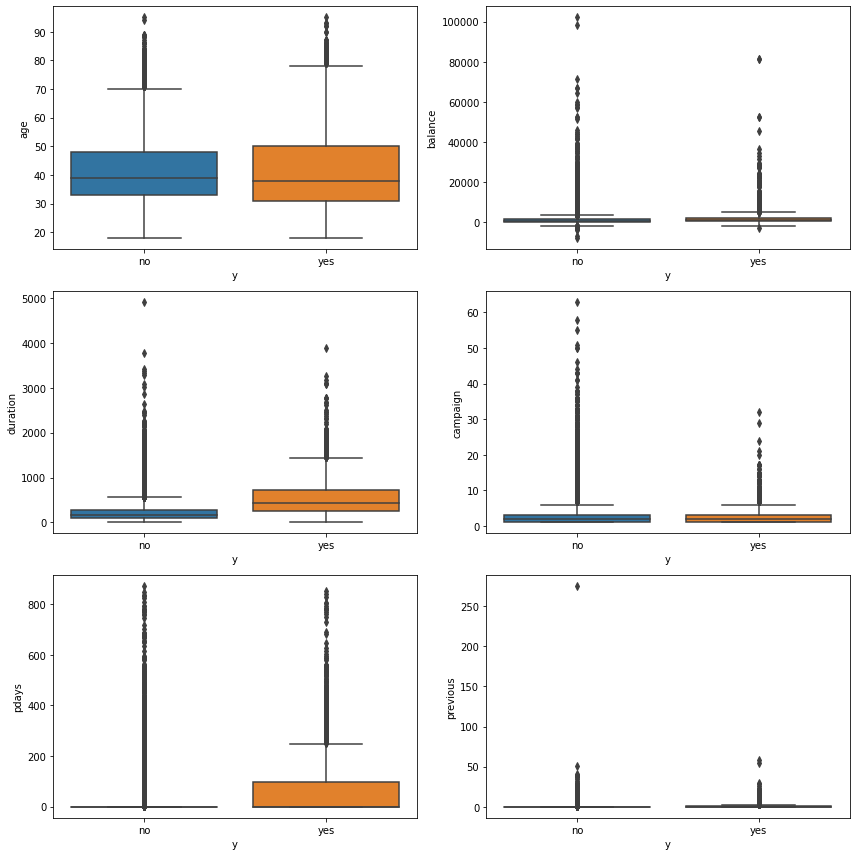

In [25]:
# Let's visualize the distribution of target / outcome (y/n) in details for each of the columns 
# using the 'hue' parameter

fig, axes = plt.subplots(3,2, figsize=(12,12))
for i in range(1,7):
    sns.boxplot(x = 'y', y = num_col[i-1], data=df, ax=axes.flat[i-1],orient = 'v')

plt.tight_layout()
plt.show()

# Distribution of duration/pdays shows clear relationship with target outcome (y/n)

In [26]:
# Let's confirm if the 'yes' and 'no' subsets of different categorical columns have the same variance
# based on Levene test

# NULL HYPOTHESIS (H0) - Target groups (yes/no) have equal variances
# ALTERNATE (H1) - Target groups (yes/no) have unequal variances

from scipy.stats import levene

for i in range(1,7):
    samp1 = df[df['y']=='no'][num_col[i-1]]
    samp2 = df[df['y']=='yes'][num_col[i-1]]
    stat, pval = levene(samp1, samp2)
    print('For column',num_col[i-1],', p value for Levene test =',pval)
    
# We can see that for each numerical column, p value is much less than 0.01
# Therefore we reject the null , i.e variances are not the same

For column age , p value for Levene test = 2.420857912510469e-133
For column balance , p value for Levene test = 5.020129382284311e-15
For column duration , p value for Levene test = 0.0
For column campaign , p value for Levene test = 8.220318168029953e-33
For column pdays , p value for Levene test = 3.79055331945749e-108
For column previous , p value for Levene test = 7.801830349772383e-88


In [27]:
# 2 sample t-test to confirm the relation of numerical variable with target
# NULL HYPOTHESIS (H0) - Mean of target groups (yes/no) are the same
# ALTERNATE (H1) - Mean of target groups (yes/no) are different

from scipy.stats import ttest_ind

for i in range(1,7):
    samp1 = df[df['y']=='no'][num_col[i-1]]
    samp2 = df[df['y']=='yes'][num_col[i-1]]
    tstat, pval = ttest_ind(samp1, samp2)
    print('For column',num_col[i-1],'t-stat =',tstat,'; p value =',pval/2)

For column age t-stat = -5.350255423036203 ; p value = 4.4128218459611975e-08
For column balance t-stat = -11.25043445878562 ; p value = 1.2605568459375734e-29
For column duration t-stat = -91.28943612670862 ; p value = 0.0
For column campaign t-stat = 15.599948860003781 ; p value = 5.0617368210481484e-55
For column pdays t-stat = -22.151671780724012 ; p value = 1.895276659739017e-108
For column previous t-stat = -19.910901271473993 ; p value = 3.9009151749026054e-88


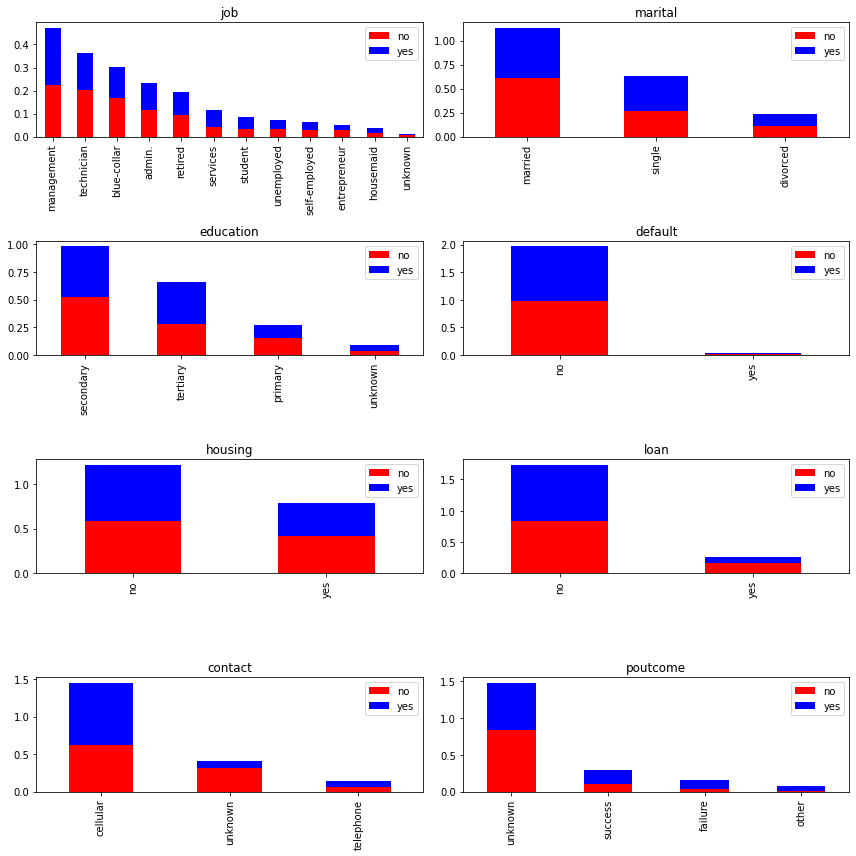

In [28]:
# Let's now check the distribution of target classes (yes/no) with respect to categorical variables

col_list = [i for i in cat_col if i not in ('day','month','y')]

fig, axes = plt.subplots(4,2, figsize=(12,12))
for i in range(1,9):
    no_count = df[df['y'] == 'no'][col_list[i-1]].value_counts(normalize=True)
    yes_count = df[df['y'] == 'yes'][col_list[i-1]].value_counts(normalize=True)
    no_count.plot(kind='bar',ax=axes.flat[i-1], color = 'r')
    yes_count.plot(kind='bar', bottom=no_count.values, ax=axes.flat[i-1], color='b')
    axes.flat[i-1].set_title("%s" %(col_list[i-1]))
    axes.flat[i-1].legend(['no','yes'], loc = 'upper right')
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()
plt.show()

In [29]:
# Again observe highly unbalanced distribution of 'yes' and 'no' outcomes in all the columns
# of given data

# ENCODING CATEGORICAL VARIABLES

In [30]:
# For binary columns - default, housing and loan, we will perform simple label encoding (0/1)

df_cat = df[cat_col]
for col in ['default','housing','loan']:
    df_cat[col] = df[col].map({'no':0,'yes':1})
df_cat[['default','housing','loan']]

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0
...,...,...,...
45206,0,0,0
45207,0,0,0
45208,0,0,0
45209,0,0,0


In [31]:
# For education & marital column, we will go with ordinal encoding with the following sequence
# {'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3}
# {'single' : 1, 'married' : 0, 'divorced': -1}
# 4% unknown values in 'education' will be imputed with the (grouped?) mode (to be decided) 

df_cat['education'].value_counts(normalize=True)  

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['unknown','primary','secondary','tertiary']])
df_cat['education'] = oe.fit_transform(df_cat['education'].values.reshape(-1,1))
df_cat

df_cat['marital'] = df_cat['marital'].map({'single':1,'married':2,'divorced':-1})
df_cat[['education','marital']]

,education,marital
0,3.0,2
1,2.0,1
2,2.0,2
3,0.0,2
4,0.0,1
...,...,...
45206,3.0,2
45207,1.0,-1
45208,2.0,2
45209,2.0,2


In [32]:
# For contact column also, we can go with simple label encoding
# {'unknown':0, 'cellular':1, 'telephone':2}

df_cat['contact'] = df_cat['contact'].map({'unknown':0, 'cellular':1, 'telephone':2})

# For poutcome, based on feature engineering study, we use the following encoding
# {'unknown':0, 'success':1, ['failure','other']:-1}

df_cat['poutcome'] = df_cat['poutcome'].map({'unknown':0, 'success':1, 'failure':-1, 'other':-1})

In [33]:
df_cat

,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,management,2,3.0,0,1,0,0,5,may,0
1,technician,1,2.0,0,1,0,0,5,may,0
2,entrepreneur,2,2.0,0,1,1,0,5,may,0
3,blue-collar,2,0.0,0,1,0,0,5,may,0
4,unknown,1,0.0,0,0,0,0,5,may,0
...,...,...,...,...,...,...,...,...,...,...
45206,technician,2,3.0,0,0,0,1,17,nov,0
45207,retired,-1,1.0,0,0,0,1,17,nov,0
45208,retired,2,2.0,0,0,0,1,17,nov,1
45209,blue-collar,2,2.0,0,0,0,2,17,nov,0


# FEATURE ENGINEERING

In [34]:
# Columns related to previous marketing campaigns - 'poutcome', 'pdays', 'previous'. We will 
# perform feature engineering on these columns to make the best use of the available data.
# Let's analyze the relation between these columns in detail

tab1 = pd.crosstab(index=df['poutcome'], columns = df['y'], values = df['pdays'], aggfunc='mean')
tab2 = pd.crosstab(index=df['poutcome'], columns = df['y'], values = df['previous'], aggfunc='mean')

pd.concat([tab1,tab2], axis=1, keys = ['pdays','previous'])

pdays              previous          
y                 no         yes        no       yes
poutcome                                            
failure   242.783329  232.679612  2.866682  3.103560
other     233.485323  210.700326  4.011089  4.000000
success   166.412758  161.540900  3.013133  3.109407
unknown    -0.966789   -0.914944  0.000417  0.000886

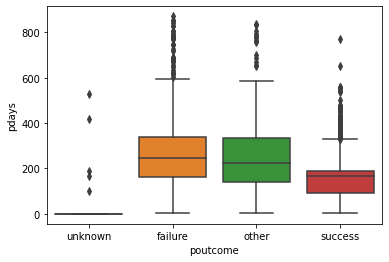

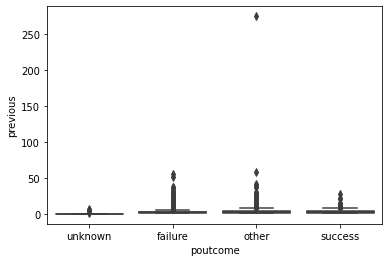

In [35]:
sns.boxplot(x = df['poutcome'], y = df['pdays'])
plt.show()
sns.boxplot(x = df['poutcome'], y = df['previous'])
plt.show()

# For poutcome "unknown", almost all the values of pdays = -1 and previous = 0 
# However pdays mean for 'success' is less than for 'failure' & 'other' categories
# Variation in 'previous' column is very less for the different categories

In [36]:
# same is confirmed by the below crosstab for poutcome 'unknown'

pd.crosstab(index=df[df['poutcome']=='unknown']['poutcome'], columns = [df['pdays'],df['previous']]).T

,poutcome,unknown
pdays,previous,
-1,0,36954
98,1,1
168,5,1
188,2,1
416,2,1
528,7,1


In [37]:
# Let's the analyze the correlation b/w pdays and previous in more detail. For this purpose,
# we transform '-1' values to '999' (no contact) for pdays.

# Feature engineering will have to be performed to separate the '-1' / '999' values out of 
# the column to derive any further insight

df[df['pdays']==-1]['previous'].value_counts().to_frame()
df[df['previous']==0]['pdays'].value_counts().to_frame()

# 'previous' = 0 for all rows where 'pdays' == -1.and vice versa 
# It indicates that pdays and previous column have some overlap

,pdays
-1,36954


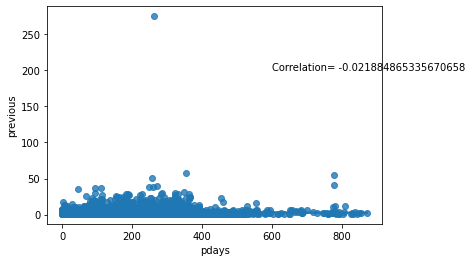

In [38]:
sns.regplot(df[df['pdays']!=-1]['pdays'], df[df['pdays']!=-1]['previous'])
plt.text(x=600, y=200, s = 'Correlation= '+str(df[df['pdays']!=-1]['pdays'].corr(df[df['pdays']!=-1]['previous'])))
plt.show()

# no correlation when you remove pdays = -1

In [39]:
# Hence we decide to remove 'pdays' and 'previous' from the features since they show high
# degree of correlation with 'poutcome' (majority common values pdays -1 = previous 0 = poutcome 'unknown')

df_num.drop(['pdays','previous'], axis=1, inplace=True)

In [40]:
# Convert 'day' into categorical variable as follows
# 'day' 1-7 : Week 1 ; 8-14 : Week 2 ; 15-21 : Week 3; 22-28 : Week 4; 29-31 : Week 5

def week_number(x):
    if x in range(1,8): return 'Week 1'
    elif x in range(8,15): return 'Week 2'
    elif x in range(15,22): return 'Week 3'
    elif x in range(22,29): return 'Week 4'
    elif x in range(29,32): return 'Week 5'
    
df_cat['week'] = df_cat['day'].apply(week_number)
df_cat.drop(['day'], axis=1, inplace=True)
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,week
0,management,2,3.0,0,1,0,0,may,0,Week 1
1,technician,1,2.0,0,1,0,0,may,0,Week 1
2,entrepreneur,2,2.0,0,1,1,0,may,0,Week 1
3,blue-collar,2,0.0,0,1,0,0,may,0,Week 1
4,unknown,1,0.0,0,0,0,0,may,0,Week 1
...,...,...,...,...,...,...,...,...,...,...
45206,technician,2,3.0,0,0,0,1,nov,0,Week 3
45207,retired,-1,1.0,0,0,0,1,nov,0,Week 3
45208,retired,2,2.0,0,0,0,1,nov,1,Week 3
45209,blue-collar,2,2.0,0,0,0,2,nov,0,Week 3


In [41]:
# Perform train test split before applying frequency encoding for the remaining categorical variables

X = pd.concat([df_cat, df_num], axis=1)
y = df[['y']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(31647, 14) (13564, 14)
(31647, 1) (13564, 1)


In [42]:
# For job column, we have 12 unique levels. Hence we can perform frequency encoding
# Ordinary frequency encoding - we replace each category by its frequency in the train set
# Target based encoding - we replace each category by the frequency of the required target class ('yes') in it.

# For month & week columns as well, perform frequency encoding based on train data 

job_freq = X_train['job'].value_counts(normalize=True)
month_freq = X_train['month'].value_counts(normalize=True)
week_freq = X_train['week'].value_counts(normalize=True)

X_train['job'] = X_train['job'].map(job_freq)
X_train['month'] = X_train['month'].map(month_freq)
X_train['week'] = X_train['week'].map(week_freq)

# Do the same for test data
X_test['job'] = X_test['job'].map(job_freq)
X_test['month'] = X_test['month'].map(month_freq)
X_test['week'] = X_test['week'].map(week_freq)

In [43]:
y_train['y'] = y_train['y'].map({'no':0, 'yes':1})
y_test['y'] = y_test['y'].map({'no':0, 'yes':1})

X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,week,age,balance,duration,campaign
1694,0.216419,1,1.0,0,1,0,0,0.303915,0,0.227857,35,337,127,1
9136,0.209499,-1,3.0,0,1,0,0,0.116441,0,0.217398,37,168,227,1
40251,0.209499,2,3.0,0,0,0,1,0.116441,-1,0.309192,33,1390,92,2
11062,0.006762,2,0.0,0,0,0,0,0.116441,0,0.309192,45,1979,76,3
4155,0.216419,2,1.0,0,1,0,0,0.303915,0,0.309192,32,1076,67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35483,0.035074,1,3.0,0,1,0,1,0.303915,-1,0.217398,28,270,49,2
39296,0.216419,-1,1.0,0,1,0,1,0.303915,0,0.309192,30,-258,18,2
2693,0.216419,2,2.0,0,1,0,0,0.303915,0,0.227857,34,-100,109,9
8076,0.216419,2,1.0,0,0,0,0,0.116441,0,0.217398,38,6843,89,1


# MODELLING
### BASE MODEL FITTING

In [44]:
# We are now ready to do some modelling on our prepared dataset of X_train and y_train
# Let's start by trying to fit a logistic regression base model on our X_train & y_train set
# No scaling of numerical variable done at this point

X_train_cons = sm.add_constant(X_train)
X_test_cons = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train_cons).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.268969
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31632
Method:                           MLE   Df Model:                           14
Date:                Tue, 08 Mar 2022   Pseudo R-squ.:                  0.2618
Time:                        08:08:40   Log-Likelihood:                -8512.1
converged:                       True   LL-Null:                       -11531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1972      0.147    -14.925      0.000      -2.486      -1.909
job           -1.3073      0.288     -4.547      0.000      -1.871      -0.744
marital       -0.1081      0.021     -5.255      0.000      -0.148      -0.068
education      0.1732      0.027      6.409      0.000       0.120       0.226
default       -0.4016      0.197     -2.042      0.041      -0.787      -0.016
housing       -0.5604      0.045    -12.359      0.000      -0.649      -0.472
loan          -0.7383      0.068    -10.784      0.000      -0.873      -0.604
contact        0.7279      0.044     16.499      0.000       0.641       0.814
month         -3.8384      0.260    -14.783      0.000      -4.347      -3.330
poutcome       0.8339      0.047     17.699      0.000       0.742       0.926
week          -1.3375      0.298     -4.488      0.000      -1.922      -0.753
age           -0.0056      0.002     -3.085      0.002      -0.009      -0.002
balance     2.088e-05   5.26e-06      3.974      0.000    1.06e-05    3.12e-05
duration       0.0040   7.33e-05     54.511      0.000       0.004       0.004
campaign      -0.1457      0.012    -12.582      0.000      -0.168      -0.123
==============================================================================
"""

In [45]:
df_odds = pd.DataFrame(np.exp(logit_model.params), columns = ['odds'])
df_odds['prob'] = df_odds['odds']/(1+df_odds['odds'])
df_odds

,odds,prob
const,0.111113,0.100001
job,0.270553,0.212941
marital,0.897555,0.473006
education,1.189126,0.543197
default,0.669241,0.400925
housing,0.570958,0.363446
loan,0.477909,0.323368
contact,2.070668,0.674338
month,0.021528,0.021074
poutcome,2.302196,0.697171


### MODEL PERFORMANCE EVALUATION

In [46]:
y_train_prob = logit_model.predict(X_train_cons)
y_test_prob = logit_model.predict(X_test_cons)

# setting probability threshold as 0.5  

y_train_pred = y_train_prob.apply(lambda x: 0 if x<0.5 else 1)
y_test_pred = y_test_prob.apply(lambda x: 0 if x<0.5 else 1)

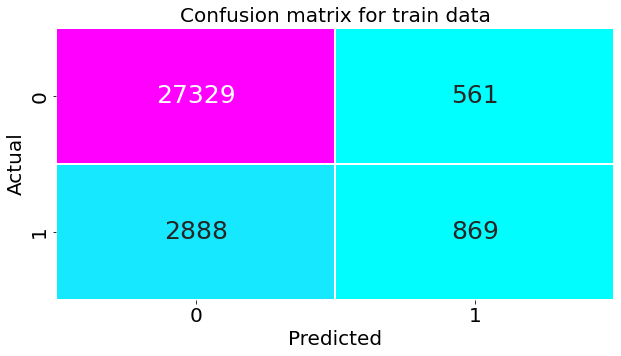

In [47]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,5))
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion matrix for train data', fontsize=20)
plt.ylabel('Actual', fontsize=20); plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize = 20); plt.yticks(fontsize = 20)
plt.show()

In [48]:
tp = train_cm[1,0]; tn = train_cm[0,0]; fp = train_cm[0,1]; fn = train_cm[1,0]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
df_scores = pd.DataFrame(columns = ['Accuracy','Precision','Recall','Specificity','FPR','F1_score'])


df_scores.loc['Train_logistic','Accuracy'] = accuracy_score(y_train, y_train_pred)
df_scores.loc['Train_logistic','Precision'] = precision_score(y_train, y_train_pred)
df_scores.loc['Train_logistic','Recall'] = recall_score(y_train, y_train_pred)
df_scores.loc['Train_logistic','Specificity'] = tn / (tn+fp)
df_scores.loc['Train_logistic','FPR']  = fp / (tn+fp)
df_scores.loc['Train_logistic','F1_score'] = f1_score(y_train, y_train_pred)

df_scores

,Accuracy,Precision,Recall,Specificity,FPR,F1_score
Train_logistic,0.891017,0.607692,0.231302,0.979885,0.020115,0.335068


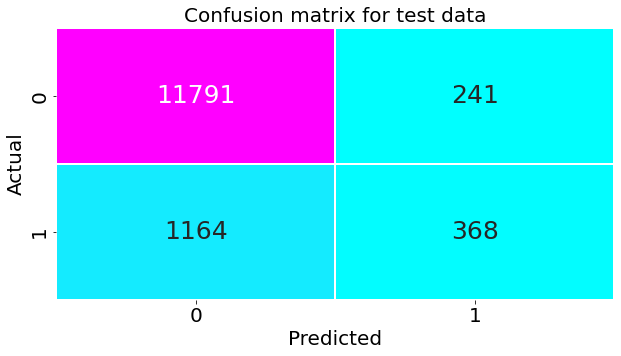

In [49]:
plt.figure(figsize=(10,5))
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion matrix for test data', fontsize=20)
plt.ylabel('Actual', fontsize=20); plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize = 20); plt.yticks(fontsize = 20)
plt.show()

In [50]:
tp_1 = test_cm[1,0]; tn_1 = test_cm[0,0]; fp_1 = test_cm[0,1]; fn_1 = test_cm[1,0]

df_scores.loc['Test_logistic','Accuracy'] = accuracy_score(y_test, y_test_pred)
df_scores.loc['Test_logistic','Precision'] = precision_score(y_test, y_test_pred)
df_scores.loc['Test_logistic','Recall'] = recall_score(y_test, y_test_pred)
df_scores.loc['Test_logistic','Specificity'] = tn_1 / (tn_1+fp_1)
df_scores.loc['Test_logistic','FPR']  = fp_1 / (tn_1+fp_1)
df_scores.loc['Test_logistic','F1_score'] = f1_score(y_test, y_test_pred)

df_scores

,Accuracy,Precision,Recall,Specificity,FPR,F1_score
Train_logistic,0.891017,0.607692,0.231302,0.979885,0.020115,0.335068
Test_logistic,0.896417,0.604269,0.240209,0.97997,0.02003,0.343765


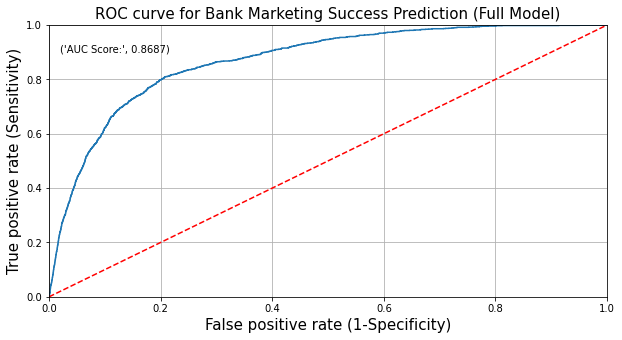

In [51]:
# Plot the ROC curve for out base model

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# print(fpr, tpr, thresholds)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')   #[0.1] and [0,1] are x y values

plt.title('ROC curve for Bank Marketing Success Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_test_prob),4)))
                               
# plot the grid
plt.grid(True)

In [52]:
# Finding the optimum threshold value by comparing performance metrics

threshold = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
score_card = pd.DataFrame(columns = ['AUC_score','Precision','Recall','Accuracy','Kappa','F1_score'])

for value in threshold:
    y_test_pred = y_test_prob.apply(lambda x: 0 if x<value else 1)
    score_card.loc[value,'AUC_score'] = roc_auc_score(y_test, y_test_pred)
    score_card.loc[value,'Precision'] = precision_score(y_test, y_test_pred)
    score_card.loc[value,'Recall'] = recall_score(y_test, y_test_pred)
    score_card.loc[value,'Accuracy'] = accuracy_score(y_test, y_test_pred)
    score_card.loc[value,'Kappa']  = cohen_kappa_score(y_test, y_test_pred)
    score_card.loc[value,'F1_score'] = f1_score(y_test, y_test_pred)
score_card
score_card.style.highlight_max(color = 'lightblue')

,AUC_score,Precision,Recall,Accuracy,Kappa,F1_score
0.1,0.789091,0.289633,0.840731,0.749115,0.315905,0.430841
0.2,0.764107,0.437020,0.631854,0.866485,0.442194,0.516680
0.3,0.698469,0.514903,0.451044,0.890003,0.419648,0.480863
0.4,0.647020,0.562430,0.326371,0.895237,0.359962,0.413052
0.5,0.610089,0.604269,0.240209,0.896417,0.298703,0.343765
0.6,0.574742,0.613300,0.162533,0.893837,0.220057,0.256966
0.7,0.551321,0.612903,0.111619,0.891699,0.159599,0.188846
0.8,0.533110,0.596774,0.072454,0.889708,0.107390,0.129220
0.9,0.518697,0.626263,0.040470,0.888897,0.063182,0.076027
